In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings

import matplotlib.pyplot as plt 
import seaborn as sns

warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [11]:
data= pd.read_csv("Flipkart_Mobiles.csv")
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [12]:
data.shape

(3114, 8)

In [13]:
data.isnull().sum()

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [14]:
data.dropna(subset=["Memory"],inplace=True)

In [15]:
data.dropna(subset=["Storage"],inplace=True)

In [16]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [17]:
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [18]:
data.isnull().sum()/data.shape[0]*100

Brand             0.0
Model             0.0
Color             0.0
Memory            0.0
Storage           0.0
Rating            0.0
Selling Price     0.0
Original Price    0.0
dtype: float64

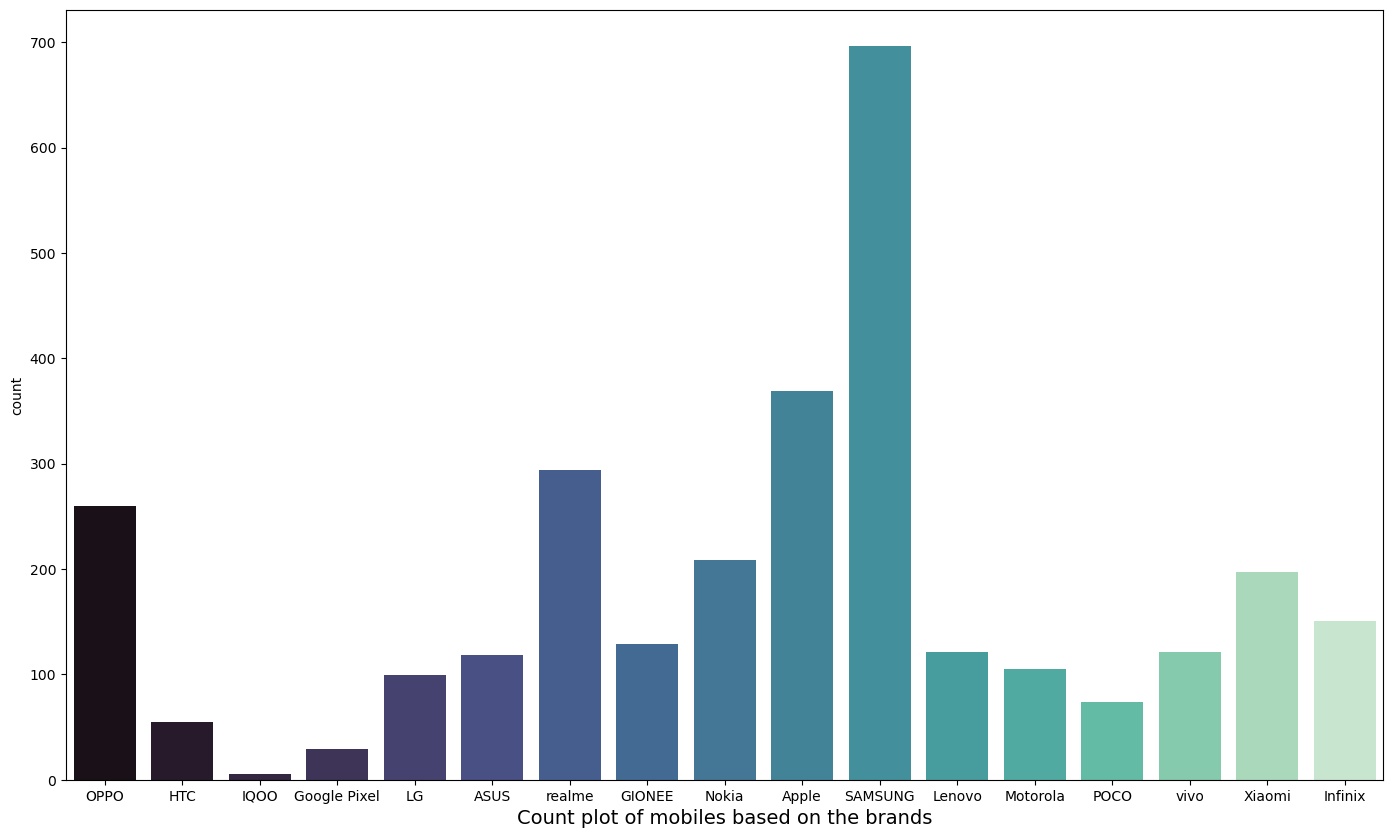

In [38]:
plt.figure(figsize=(17,10))
sns.countplot(x='Brand' , data=data ,palette='mako')
plt.xlabel('Count plot of mobiles based on the brands', fontsize=14)
plt.show()

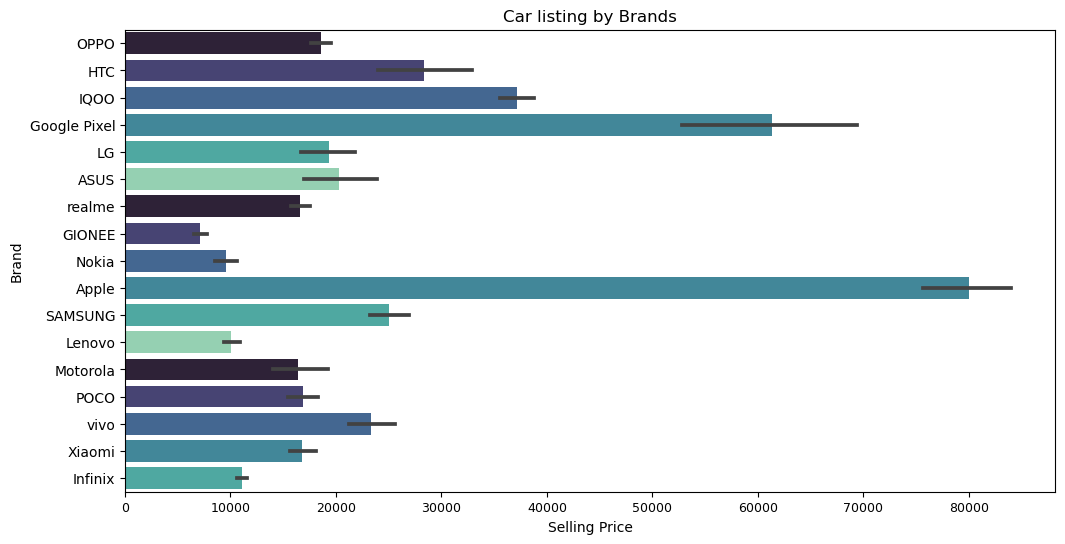

In [41]:
plt.figure(figsize = (12,6))
pal = sns.color_palette('mako')
sns.barplot(data, x="Selling Price", y="Brand",
           palette=pal
           )
plt.title('Car listing by Brands')
plt.xticks(
            fontsize = 9)
plt.show()

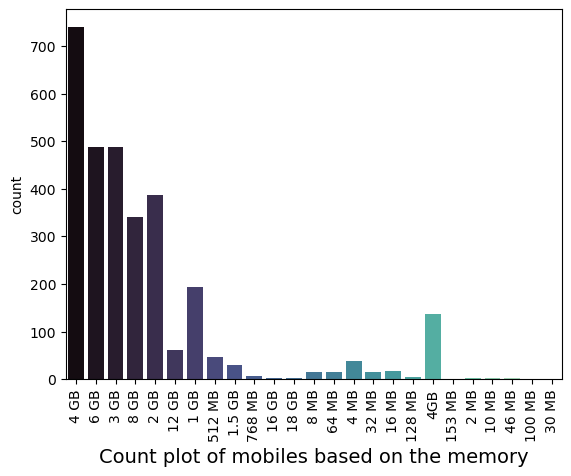

In [54]:
sns.countplot(x="Memory",data=data, palette="mako")
plt.xticks(rotation=90)
plt.xlabel('Count plot of mobiles based on the memory', fontsize=14)
plt.show()

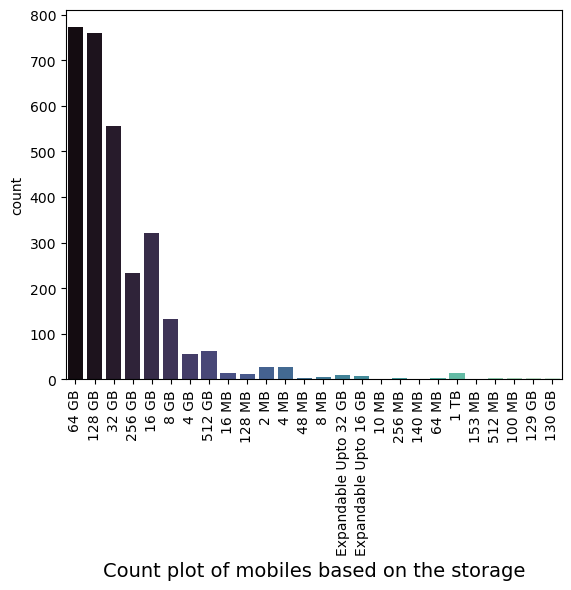

In [55]:
sns.countplot(x="Storage",data=data, palette="mako")
plt.xticks(rotation=90)
plt.xlabel('Count plot of mobiles based on the storage', fontsize=14)
plt.show()

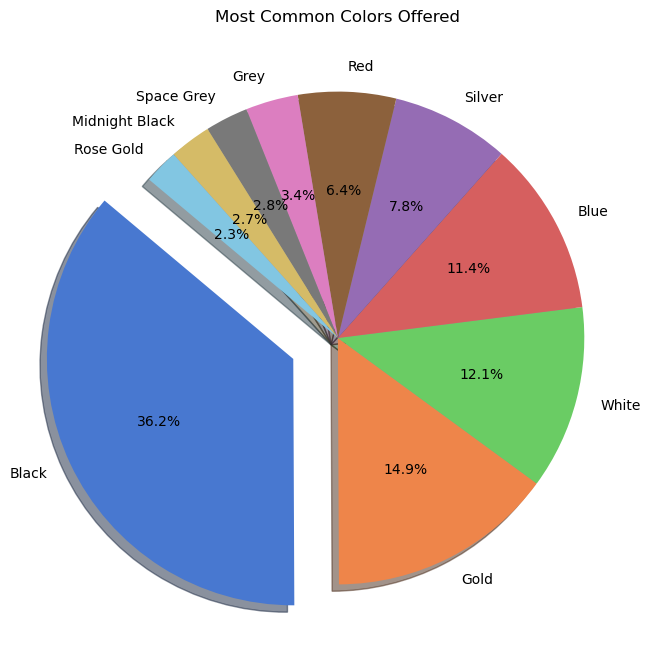

In [58]:
common_colors = data["Color"].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(common_colors,labels=common_colors.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("muted"),explode=[0.2,0,0,0,0,0,0,0,0,0],shadow=True)
plt.title("Most Common Colors Offered")
plt.show()

<Axes: xlabel='Rating', ylabel='Density'>

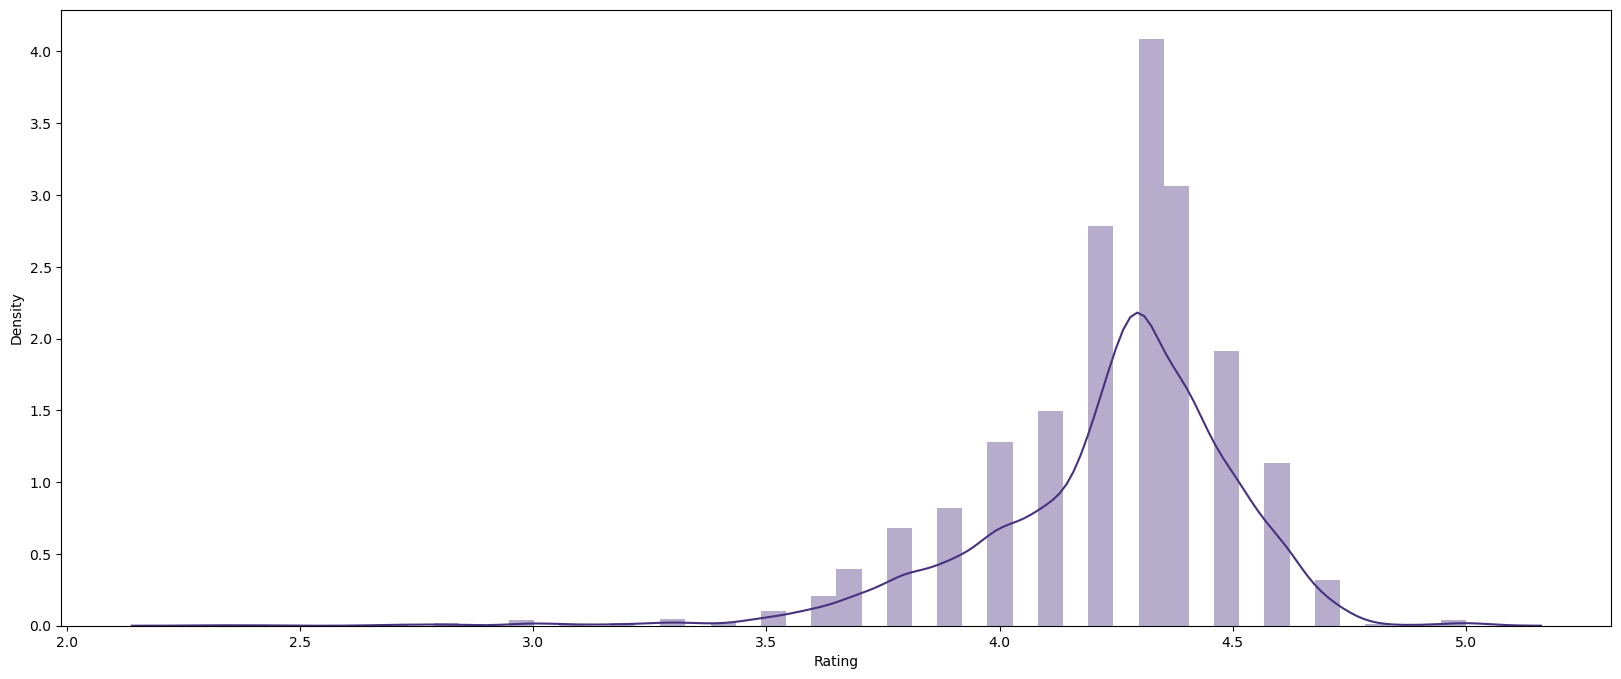

In [59]:
plt.figure(figsize=(20,8))
sns.distplot(data.Rating)

In [84]:
data = data.rename({'Selling Price':'Selling_Price','Original Price':'Original_Price'}, axis=1)
data.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [85]:
data1=data.pivot_table(index='Brand',columns='Model',values='Rating').reset_index(drop=True)
data1.head()

Model,1,10,105,105 DS,105 DS 2020,105 SS 2021,106,107 Dual SIM,108 Dual SIM,11 Lite NE,...,iPhone 6s Plus,iPhone 7,iPhone 7 Plus,iPhone 8,iPhone 8 Plus,iPhone SE,iPhone X,iPhone XR,iPhone XS,iPhone XS Max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.4,4.519048,4.55,4.6,4.6,4.5,4.6,4.6,4.7,4.6
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
data1.index=data['Brand'].unique()
data1.head()

Model,1,10,105,105 DS,105 DS 2020,105 SS 2021,106,107 Dual SIM,108 Dual SIM,11 Lite NE,...,iPhone 6s Plus,iPhone 7,iPhone 7 Plus,iPhone 8,iPhone 8 Plus,iPhone SE,iPhone X,iPhone XR,iPhone XS,iPhone XS Max
OPPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.4,4.519048,4.55,4.6,4.6,4.5,4.6,4.6,4.7,4.6
IQOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Pixel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LG,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
data1.fillna(0,inplace=True)
data1.head()

Model,1,10,105,105 DS,105 DS 2020,105 SS 2021,106,107 Dual SIM,108 Dual SIM,11 Lite NE,...,iPhone 6s Plus,iPhone 7,iPhone 7 Plus,iPhone 8,iPhone 8 Plus,iPhone SE,iPhone X,iPhone XR,iPhone XS,iPhone XS Max
OPPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.4,4.519048,4.55,4.6,4.6,4.5,4.6,4.6,4.7,4.6
IQOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Pixel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LG,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [89]:
user_sim=1-pairwise_distances(data1.values,metric='cosine')
user_sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0358293 , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.30158961, 0.        , 0.        , 0.        , 0.        ,
        0.06402953, 0.        , 0.        , 0.        , 0.        ,
        0.07876437, 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [90]:
user_sim2=pd.DataFrame(user_sim)
user_sim2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.035829,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.30159,0.0,0.0,0.0,0.0,0.06403,0.0,0.000000,0.0,0.0,0.078764,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.028153


In [91]:
user_sim2.index=data['Brand'].unique()
user_sim2.columns=data['Brand'].unique()
user_sim2.head()

,OPPO,HTC,IQOO,Google Pixel,LG,ASUS,realme,GIONEE,Nokia,Apple,SAMSUNG,Lenovo,Motorola,POCO,vivo,Xiaomi,Infinix
OPPO,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
HTC,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
IQOO,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.035829,0.0,0.0,0.000000,0.000000
Google Pixel,0.0,0.0,0.0,1.0,0.0,0.30159,0.0,0.0,0.0,0.0,0.06403,0.0,0.000000,0.0,0.0,0.078764,0.000000
LG,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.028153


In [92]:
np.fill_diagonal(user_sim,0)
user_sim2.head()

,OPPO,HTC,IQOO,Google Pixel,LG,ASUS,realme,GIONEE,Nokia,Apple,SAMSUNG,Lenovo,Motorola,POCO,vivo,Xiaomi,Infinix
OPPO,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
HTC,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
IQOO,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.035829,0.0,0.0,0.000000,0.000000
Google Pixel,0.0,0.0,0.0,0.0,0.0,0.30159,0.0,0.0,0.0,0.0,0.06403,0.0,0.000000,0.0,0.0,0.078764,0.000000
LG,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.028153


In [93]:
user_sim2.idxmax(axis=1)

OPPO                    OPPO
HTC                     OPPO
IQOO                Motorola
Google Pixel            ASUS
LG                   Infinix
ASUS            Google Pixel
realme                  OPPO
GIONEE                 Nokia
Nokia                 GIONEE
Apple                   OPPO
SAMSUNG                 ASUS
Lenovo              Motorola
Motorola                IQOO
POCO                    OPPO
vivo                    OPPO
Xiaomi                  ASUS
Infinix                   LG
dtype: object

In [112]:
id1=data[data['Selling_Price']==44999]
id1.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
255,Google Pixel,3a XL,Clearly White,4 GB,64 GB,4.5,44999,44999
257,Google Pixel,3a XL,Just Black,4 GB,64 GB,4.5,44999,44999
1330,Apple,iPhone 6,Space Grey,1 GB,64 GB,4.4,44999,44999


In [113]:
id2=data[data['Selling_Price']==11990]
id2.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.500000,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.500000,11990,15990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.500000,11990,15990
645,realme,1,Diamond Black,3 GB,32 GB,4.241319,11990,12990
720,realme,U1,Fiery Gold,4 GB,64 GB,4.400000,11990,15499


In [114]:
data[(data['Selling_Price']==44999) | (data['Selling_Price']==11990)]

,Brand,Model,Color,Memory,Storage,Rating,Selling_Price,Original_Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.500000,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.500000,11990,15990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.500000,11990,15990
255,Google Pixel,3a XL,Clearly White,4 GB,64 GB,4.500000,44999,44999
257,Google Pixel,3a XL,Just Black,4 GB,64 GB,4.500000,44999,44999
645,realme,1,Diamond Black,3 GB,32 GB,4.241319,11990,12990
720,realme,U1,Fiery Gold,4 GB,64 GB,4.400000,11990,15499
725,realme,2,Diamond Blue,4 GB,64 GB,4.400000,11990,11990
769,realme,2,Diamond Black,4 GB,64 GB,4.400000,11990,11990
1050,Nokia,6.1 Plus,Blue,6 GB,64 GB,4.100000,11990,16999


In [115]:
id1.Selling_Price

255     44999
257     44999
1330    44999
Name: Selling_Price, dtype: int64

In [116]:
pd.merge(id1,id2,on='Selling_Price',how='outer')

,Brand_x,Model_x,Color_x,Memory_x,Storage_x,Rating_x,Selling_Price,Original_Price_x,Brand_y,Model_y,Color_y,Memory_y,Storage_y,Rating_y,Original_Price_y
0,Google Pixel,3a XL,Clearly White,4 GB,64 GB,4.5,44999,44999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Google Pixel,3a XL,Just Black,4 GB,64 GB,4.5,44999,44999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apple,iPhone 6,Space Grey,1 GB,64 GB,4.4,44999,44999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,OPPO,A53,Moonlight Black,4 GB,64 GB,4.500000,15990.0
4,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,OPPO,A53,Mint Cream,4 GB,64 GB,4.500000,15990.0
5,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,OPPO,A53,Electric Black,4 GB,64 GB,4.500000,15990.0
6,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,realme,1,Diamond Black,3 GB,32 GB,4.241319,12990.0
7,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,realme,U1,Fiery Gold,4 GB,64 GB,4.400000,15499.0
8,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,realme,2,Diamond Blue,4 GB,64 GB,4.400000,11990.0
9,NaN,NaN,NaN,NaN,NaN,NaN,11990,NaN,realme,2,Diamond Black,4 GB,64 GB,4.400000,11990.0


In [56]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,Rating,Selling Price,Original Price
Rating,1.000000,0.403854,0.403595
Selling Price,0.403854,1.000000,0.985189
Original Price,0.403595,0.985189,1.000000


In [149]:
def get_recommendation(customer_id):
    # Assuming user_sim2 is a similarity matrix with customer IDs as columns and rows
    similar_customers = list(user_sim2.sort_values(customer_id, ascending=False).head(3).index)

    # Assuming 'Brand' is a column in the data DataFrame representing the customer ID
    mobile_list = list(data[data['Brand'].isin(similar_customers)]['Selling_Price'])

    # Assuming 'Brand' is a column in the data DataFrame representing the customer ID
    purchased_mobiles = set(data[data['Brand'] == customer_id]['Selling_Price'])

    # Filter out the mobiles that the customer has already purchased
    recommended_mobile = set(mobile_list) - purchased_mobiles

    return recommended_mobile

In [151]:
recommendations = get_recommendation('Apple')
print("Recommended mobiles:", recommendations)

Recommended mobiles: {11779, 41990, 20999, 16399, 7698, 7699, 19990, 13850, 18979, 38950, 18990, 39990, 19000, 18490, 12349, 14398, 60990, 18499, 17990, 13899, 17995, 13900, 38990, 17999, 18000, 17490, 25684, 13399, 12889, 15449, 16990, 8799, 9828, 14949, 16999, 17000, 16488, 14443, 8299, 14450, 15990, 7798, 22650, 11900, 15998, 15999, 15490, 14980, 26758, 10888, 15500, 14990, 24719, 14995, 22163, 35990, 14999, 15000, 19100, 21150, 12449, 13990, 24744, 11946, 11948, 9900, 26798, 34990, 13999, 13489, 13490, 19119, 22189, 34999, 11960, 26295, 9399, 13499, 13500, 12990, 24768, 8389, 12999, 26824, 26828, 10450, 12499, 9940, 12500, 11990, 54999, 24283, 9950, 11999, 12000, 24798, 21736, 9450, 11499, 10990, 10999, 11000, 10490, 9468, 10499, 9989, 9990, 9478, 18187, 30990, 9999, 10000, 9998, 9490, 30994, 24338, 9499, 9500, 8990, 25889, 29990, 8490, 27950, 29999, 45871, 29489, 8498, 7989, 7990, 24890, 15677, 7999, 24900, 28999, 7499, 27990, 6999, 10070, 19799, 18778, 27999, 6499, 21349, 17765, 

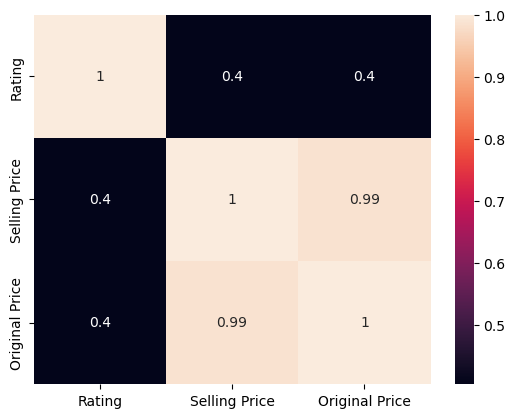

In [57]:
sns.heatmap(corr_matrix,annot=True)
plt.show()